In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [4]:
df.info() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [6]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce', dayfirst=True)
print(df['Дата'].dtype)  
print(df.head())  



datetime64[ns]
        Дата  Склад Контрагент Номенклатура  Количество
0 2018-04-01      1  address_0    product_0           4
1 2018-04-01      1  address_0    product_1           4
2 2018-04-01      1  address_0    product_2           5
3 2018-04-01      1  address_0    product_3          10
4 2018-04-01      1  address_0    product_4           2


Сгруппируйте данные по дате, посчитайте количество продаж

In [63]:
df_grouped = df.groupby('Дата', as_index=False)['Количество'].sum()
print(df_grouped.head())
  



        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Вывести несколько первых строк сгруппированных данных

In [8]:
print(df_grouped.head(10))


        Дата  Количество продаж
0 2018-01-02               1521
1 2018-01-03               1387
2 2018-01-04               1455
3 2018-01-05               1481
4 2018-01-06               1467
5 2018-01-07               1411
6 2018-01-08               1445
7 2018-02-02               1472
8 2018-02-03               1405
9 2018-02-05               1454


Нарисуйте график продаж у `grouped_df`

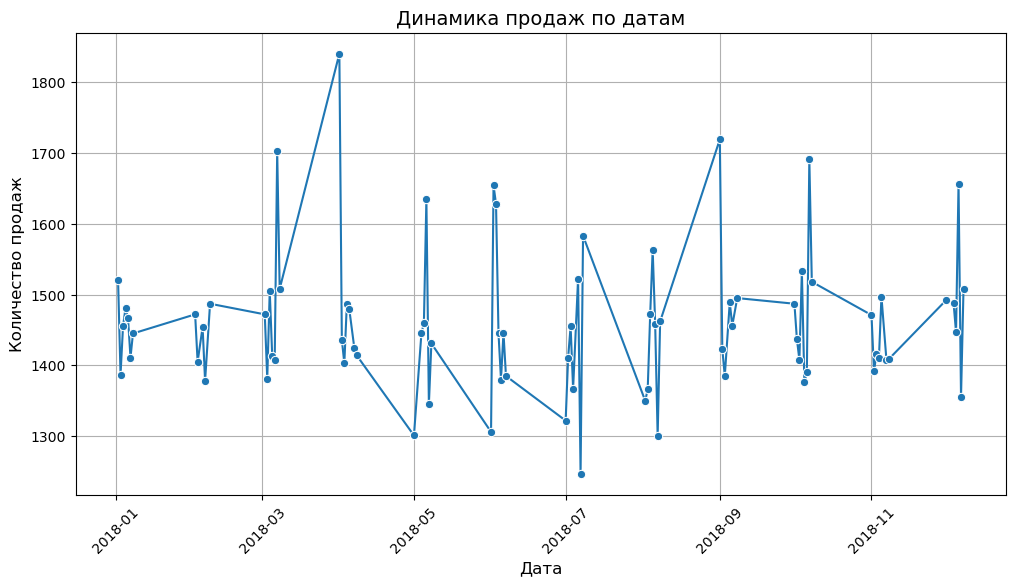

In [10]:
df_grouped['Дата'] = pd.to_datetime(df_grouped['Дата'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Дата', y='Количество продаж', marker='o')
plt.title("Динамика продаж по датам", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Количество продаж", fontsize=12)
plt.xticks(rotation=45) 

plt.grid(True)
plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
Опишите что вы видите на графике. Ваша задача - максимально описать график
Ось X (Горизонтальная ось) – Дата:

Отражает временной диапазон, начиная с января 2018 года и заканчивая примерно ноябрем 2018 года.
Даты подписаны с шагом в месяц, что позволяет увидеть долгосрочные тренды.
Ось Y (Вертикальная ось) – Количество продаж:

Показывает объем продаж за каждый день в указанном периоде.
Значения варьируются в диапазоне от примерно 1300 до 1850 продаж в день.
Основные тренды и особенности:

Общий уровень продаж колеблется вокруг отметки 1400-1500 единиц.
Есть резкие всплески и падения:
Самый высокий пик наблюдается в марте-апреле 2018 года (около 1850 продаж).
Значительное падение продаж отмечается в мае и июле (до 1300).
Регулярные колебания: продажи не держатся на стабильном уровне, а показывают цикличные подъемы и спады.
Во второй половине года (с июля по ноябрь) также наблюдаются резкие скачки, но уровень колебаний становится чуть ниже.
Возможные причины колебаний:

Промоакции, сезонность или праздники могли вызвать резкие подъемы.
Спады могут быть связаны с низким спросом, сезонными факторами или изменениями в маркетинговых стратегиях.
Колебания могут быть вызваны внешними факторами (изменение цен, конкуренция, экономическая ситуация).

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [14]:
import pandas as pd

df = pd.read_csv('data.csv')
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[df['Количество'] > upper_bound]
max_outlier = outliers.loc[outliers['Количество'].idxmax()]
print(max_outlier)

Дата             2018-06-28
Склад                     1
Контрагент      address_208
Номенклатура      product_0
Количество              200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [17]:
df_filtered = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &  
    (df['Дата'].dt.day_name() == 'Wednesday') &  
    (df['Склад'] == 3)  # Склад №3
]

top_product = df_filtered.groupby('Номенклатура')['Количество'].sum().idxmax()
print(f'Топовый товар по продажам по средам за лето на складе №3: {top_product}')


Топовый товар по продажам по средам за лето на складе №3: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [26]:
import pandas as pd

# Загрузка данных о погоде из файла Excel
weather_df = pd.read_excel('ПогодаАстана.xls')


In [27]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [54]:
weather_df = pd.read_excel('weather_data.xls', sheet_name=0)  
weather_df.columns = ['Дата', 'Температура']
weather_df = weather_df.dropna()
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%d.%m.%Y %H:%M', errors='coerce')
weather_df = weather_df.groupby(weather_df['Дата'].dt.date)['Температура'].mean().reset_index()

weather_df.head()

,Дата,Температура
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.075
4,2018-01-05,-16.8625


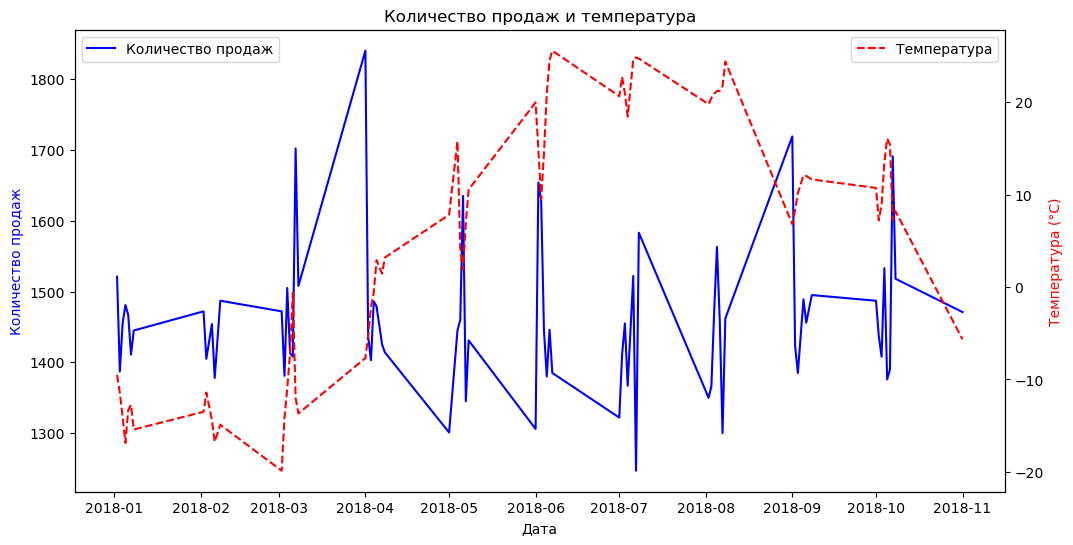

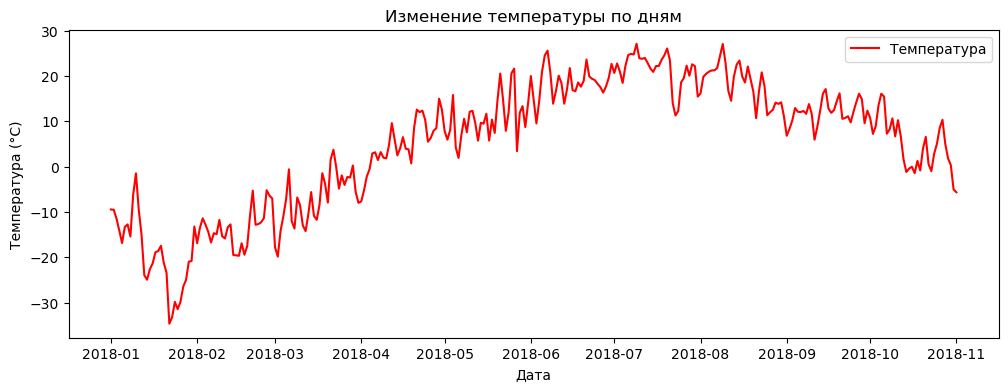

In [60]:
df_grouped['Дата'] = pd.to_datetime(df_grouped['Дата'], format='%Y-%m-%d', errors='coerce')
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%Y-%m-%d', errors='coerce')
merged_df = pd.merge(df_grouped, weather_df, left_on='Дата', right_on='Дата', how='inner')
merged_df.head()
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(merged_df['Дата'], merged_df['Количество продаж'], color='b', label='Количество продаж')
ax2.plot(merged_df['Дата'], merged_df['Температура'], color='r', label='Температура', linestyle='dashed')

ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='b')
ax2.set_ylabel('Температура (°C)', color='r')
ax1.set_title('Количество продаж и температура')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

plt.figure(figsize=(12, 4))
plt.plot(weather_df['Дата'], weather_df['Температура'], color='r', label='Температура')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Изменение температуры по дням')
plt.legend()
plt.show()

In [62]:
df_grouped['Дата'] = pd.to_datetime(df_grouped['Дата'], format='%Y-%m-%d', errors='coerce')
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%Y-%m-%d', errors='coerce')
merged_df = pd.merge(df_grouped, weather_df, left_on='Дата', right_on='Дата', how='inner')
merged_df.head()

,Дата,Количество продаж,Температура
0,2018-01-02,1521,-9.5125
1,2018-01-03,1387,-11.4625
2,2018-01-04,1455,-14.075
3,2018-01-05,1481,-16.8625
4,2018-01-06,1467,-13.3
